In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


4422102/4422102 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


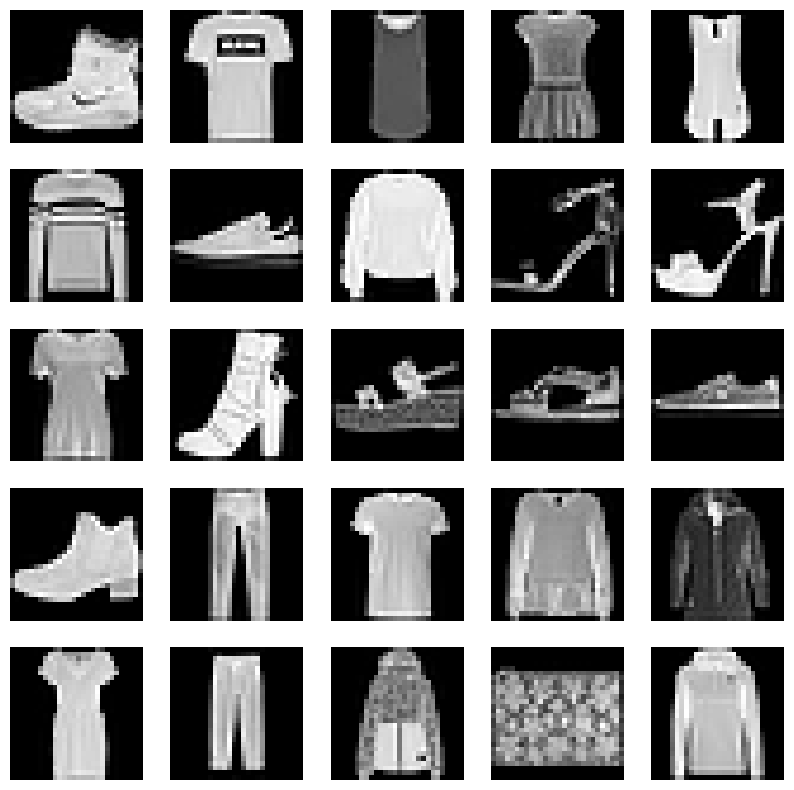

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Check the shape of the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Visualize a few images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

# Normalize the pixel values to range 0-1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [5]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 11s 4ms/step - loss: 0.4558 - accuracy: 0.8371 - val_loss: 0.3486 - val_accuracy: 0.8759
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3025 - accuracy: 0.8888 - val_loss: 0.2968 - val_accuracy: 0.8915
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2540 - accuracy: 0.9070 - val_loss: 0.2728 - val_accuracy: 0.9025
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2210 - accuracy: 0.9180 - val_loss: 0.2598 - val_accuracy: 0.9067
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1953 - accuracy: 0.9267 - val_loss: 0.2566 - val_accuracy: 0.9069
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1717 - accuracy: 0.9356 - val_loss: 0.2561 - val_accuracy: 0.9090
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1520 - accuracy: 0.9432 - val_loss: 0.2698 - val_accuracy

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.3135 - accuracy: 0.9093
Test accuracy: 0.9093000292778015


In [7]:
predictions = model.predict(X_test)


313/313 [==============================] - 1s 2ms/step


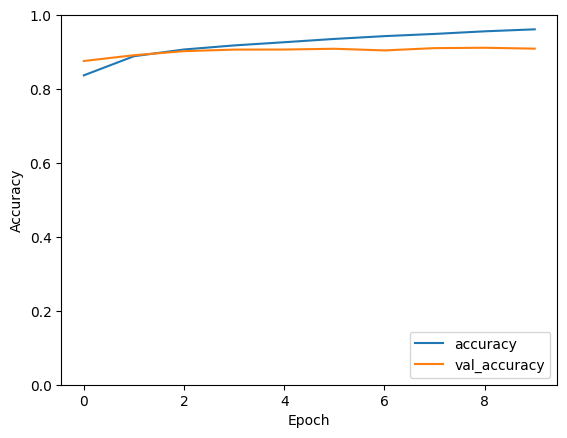

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [19]:
!pip install keras
!pip install tensorflow


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to range 0-1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Reshape the data to add a channel dimension
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Define a function to create the model
def create_model(optimizer='adam', activation='relu'):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation=activation, input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation=activation),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=activation),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=32, verbose=0)

# Define the grid search parameters
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'sigmoid']
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


In [21]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Make predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

Epoch 1/10
1875/1875 [==============================] - 12s 4ms/step - loss: 0.4487 - accuracy: 0.8381 - val_loss: 0.3481 - val_accuracy: 0.8726
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2972 - accuracy: 0.8913 - val_loss: 0.3044 - val_accuracy: 0.8910
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2520 - accuracy: 0.9069 - val_loss: 0.2730 - val_accuracy: 0.8988
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2201 - accuracy: 0.9192 - val_loss: 0.2709 - val_accuracy: 0.9004
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1966 - accuracy: 0.9267 - val_loss: 0.2553 - val_accuracy: 0.9057
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1731 - accuracy: 0.9352 - val_loss: 0.2646 - val_accuracy: 0.9027
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1541 - accuracy: 0.9419 - val_loss: 0.2739 - val_accuracy